# Exploring Dandiset 001375: Septum GABA disruption with DREADDs

**AI-generated notebook – caution: not fully verified.**  
This notebook was generated with the help of AI and is intended as a starting point for exploring Dandiset 001375 (version 0.250406.1855) from the DANDI Archive. Please **read code and results carefully** before drawing scientific conclusions.

---

## Dandiset Overview

- **Title:** Septum GABA disruption with DREADDs
- **Description:** Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity.
- **Contributors:** Eckert, Michael; McNaughton, Bruce; Ferbinteanu, Janina; NIH Brain
- **License:** CC-BY-4.0
- **Version:** 0.250406.1855
- **Dandiset link:** [https://dandiarchive.org/dandiset/001375/0.250406.1855](https://dandiarchive.org/dandiset/001375/0.250406.1855)

## What this notebook covers

- Loading of Dandiset metadata and sample NWB file using the DANDI API
- Examination of the available data and its organization in NWB
- Visualization of selected data and metadata
- Suggestions for further exploration

## Required Packages

This notebook requires the following packages (install them if needed):
- dandi
- pynwb
- remfile
- h5py
- numpy
- pandas
- matplotlib
- seaborn

## Connect to the DANDI Archive and load Dandiset metadata

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001375", "0.250406.1855")

metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855

First 5 assets:
- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb (ID: ce525828-8534-4b56-9e47-d2a34d1aa897)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb (ID: 376dc673-611b-4521-b135-9ec01c7f4f74)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb (ID: fea95c0e-2f07-49a3-b607-4b7e9f278e16)


## Select an NWB file for exploration

For illustration, we'll use the file:
- **Path:** `sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb`
- **DANDI asset ID:** `ce525828-8534-4b56-9e47-d2a34d1aa897`
- **Download URL:**  
  https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/

You can also open this file on Neurosift for interactive exploration:  
[Neurosift NWB Viewer](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft)

We'll demonstrate how to connect, inspect, and visualize data from this file below.

## Load the NWB file using PyNWB and remfile (streamed access)

> **Note:** Streaming remote NWB files can be slow, especially for large datasets. For quick inspection, we load only small portions as examples.

In [2]:
import pynwb
import h5py
import remfile

url = "https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print("File loaded.")
print("Session description:", nwb.session_description)
print("Subject:", nwb.subject.subject_id, "-", nwb.subject.description)

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


File loaded.
Session description: mouse running laps in virtual hallway
Subject: MS13B - medial septum DREADD to suppress GABA interneurons


## NWB file contents overview

```
Session description: mouse running laps in virtual hallway
Session start time: 2024-07-25T19:00:00-07:00
Subject ID: MS13B
Subject description: medial septum DREADD to suppress GABA interneurons

Main sections:
├─ acquisition
│   └─ time_series: Raw extracellular recording (shape: [144,675,584 x 256], unit: mV)
├─ electrode_groups
│   ├─ shank1: ventral hippocampus, visual cortex, device: 128 ch silicon probe (UCLA)
│   └─ shank2: ventral hippocampus, visual cortex, device: 128 ch silicon probe (UCLA)
├─ devices
│   └─ silicon probe array: 128 ch silicon probe (UCLA)
├─ intervals
│   └─ trials (387 laps): start/stop times
├─ electrodes: Table of 256 electrodes (x/y/location/filtering/group/group_name/label)
├─ units: Table of 33 sorted units (spike_times)
```

The table below summarizes some of the core data groups:

In [3]:
import pandas as pd

summary = pd.DataFrame([
    ["acquisition/time_series", "Raw electrophysiology data", "144,675,584 x 256", "int16, mV"],
    ["electrodes", "Electrode table", "256 x 7", "Varied"],
    ["units", "Sorted units", "33 x 1", "spike_times (variable-length)"],
    ["intervals/trials", "Behavioral laps/trials", "387 x 2", "start_time, stop_time"],
], columns=["Group/Field", "Description", "Shape/Count", "Notes"])
summary

,Group/Field,Description,Shape/Count,Notes
0,acquisition/time_series,Raw electrophysiology data,"144,675,584 x 256","int16, mV"
1,electrodes,Electrode table,256 x 7,Varied
2,units,Sorted units,33 x 1,spike_times (variable-length)
3,intervals/trials,Behavioral laps/trials,387 x 2,"start_time, stop_time"


## Exploring subject metadata

In [4]:
subject = nwb.subject
print("Subject ID:", subject.subject_id)
print("Species:", subject.species)
print("Sex:", subject.sex)
print("Age:", subject.age, "(", getattr(subject, 'age__reference', None), ")")
print("Description:", subject.description)

Subject ID: MS13B
Species: Mus musculus
Sex: M
Age: P90D ( birth )
Description: medial septum DREADD to suppress GABA interneurons


## Inspecting time intervals (trials)

Trials mark laps/trials in the experiment. Let's look at the first few laps:

In [5]:
trials_df = nwb.trials.to_dataframe()
display(trials_df.head())

print(f"Total number of trials: {len(trials_df)}")

,start_time,stop_time
id,,
0,4.323800,16.929833
1,16.963067,28.414333
2,28.447100,39.402833
3,39.435833,50.027033
4,50.059667,63.064467


Total number of trials: 387


## Electrode information

The electrodes table lists all electrodes and their metadata. We'll preview the first few rows.

In [6]:
electrodes_df = nwb.electrodes.to_dataframe()
display(electrodes_df.head())

print(f"Number of electrodes: {len(electrodes_df)}")
print("Electrodes fields:", list(electrodes_df.columns))

,x,y,location,filtering,group,group_name,label
id,,,,,,,
0,20.0,1375.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x12844...,shank1,shank1-electrode001
1,20.0,1325.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x12844...,shank1,shank1-electrode002
2,20.0,1275.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x12844...,shank1,shank1-electrode003
3,20.0,1225.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x12844...,shank1,shank1-electrode004
4,20.0,1175.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x12844...,shank1,shank1-electrode005


Number of electrodes: 256
Electrodes fields: ['x', 'y', 'location', 'filtering', 'group', 'group_name', 'label']


## Sorted units: spike times

The units table contains information about sorted units (putative neurons). Spike times are variable-length arrays per unit.
Let's preview the spike times for a few units, and plot a simple raster for the first 5 units.

,spike_times
id,
1,"[3.5485, 3.5543666666666667, 3.784666666666667..."
2,"[0.1826, 0.21976666666666667, 0.77823333333333..."
3,"[0.005533333333333334, 0.01633333333333333, 0...."
4,"[0.5452333333333333, 0.5632, 0.572833333333333..."
5,"[0.07036666666666666, 0.1002, 0.17066666666666..."


Number of units: 33


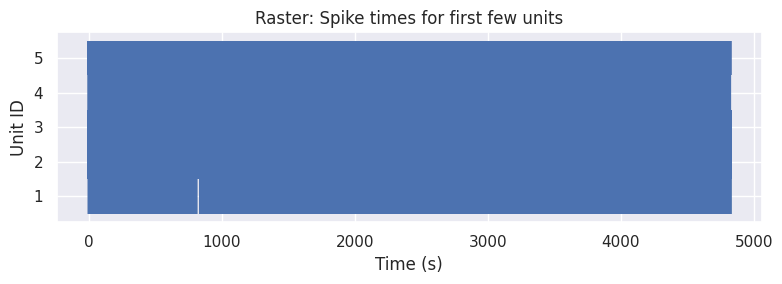

In [7]:
units_df = nwb.units.to_dataframe()
display(units_df.head())

print(f"Number of units: {len(units_df)}")

# Plot spike times raster for a few units
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
plt.figure(figsize=(8, 3))
n_show = 5
for i in range(min(n_show, len(units_df))):
    st = units_df.iloc[i]['spike_times']
    plt.vlines(st, i + 0.5, i + 1.5)
plt.yticks(np.arange(1, n_show + 1), units_df.index[:n_show])
plt.xlabel('Time (s)')
plt.ylabel('Unit ID')
plt.title('Raster: Spike times for first few units')
plt.tight_layout()
plt.show()

## Raw extracellular data: preview a small segment

The raw data are very large. We'll extract and plot a short snippet (e.g., 1 second from the first 5 channels).
**Note:** This may still take several seconds due to remote streaming.

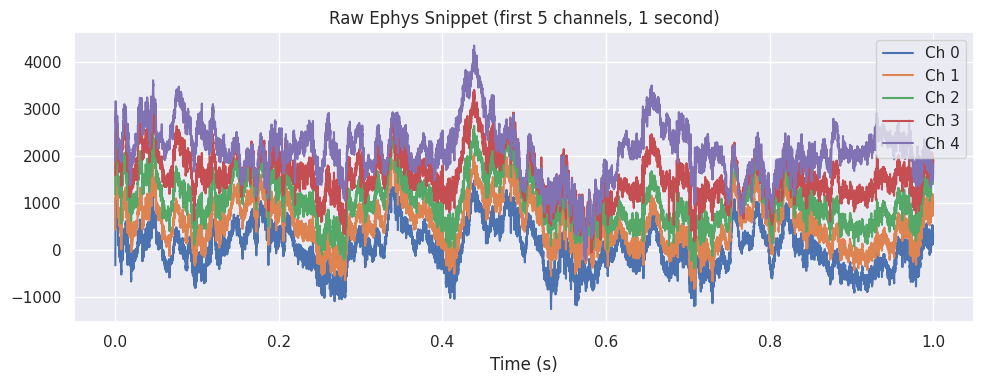

In [8]:
ts = nwb.acquisition["time_series"]
rate = ts.rate
n_chans = ts.data.shape[1]
n_samples = int(rate)  # 1 second

snippet = ts.data[:n_samples, :5]  # first 1 second, first 5 channels
time_axis = np.arange(n_samples) / rate

plt.figure(figsize=(10, 4))
offsets = np.arange(5) * 500
for i in range(5):
    plt.plot(time_axis, snippet[:, i] + offsets[i], label=f'Ch {i}')
plt.xlabel('Time (s)')
plt.title('Raw Ephys Snippet (first 5 channels, 1 second)')
plt.legend()
plt.tight_layout()
plt.show()

## Suggestions for further exploration
- Browse the [Neurosift NWB Viewer](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft) for interactive visualization.
- Explore trial-averaged firing rates, spike time autocorrelations, or LFP signals.
- Investigate relationships between behavioral events (trials) and neuronal activity.
- Use electrode locations/mappings for spatial analysis.
- Examine more assets or other sessions within the Dandiset.

---

*Notebook generated via AI. Please verify all steps and consult raw Dandiset resources for scientific research.*